Penyelesaian studi kasus ekonometrika


• NRP mod 3 = 0: Model Regresi Linier Berganda dengan kasus multikolinieritas dan atau heteroskedastisitas, lakukan uji residual dan autokorelasi

• NRP mod 3 = 1: Model Regresi dengan Variabel Dummy

• NRP mod 3 = 2: Model Regresi Probit

Sumber Data: BPS, Data Jabar, Data Jakarta, BPS, Kaggle, dll.
File yang dikumpulkan: step by step penyelesaian studi kasus dalam pptx dan ppsx

### Buatlah Model Regresi Linier Berganda dengan kasus multikolinieritas dan atau heteroskedastisitas, lakukan uji residual dan autokorelasi

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

# https://www.kaggle.com/datasets/arclaint/seki-bank-indonesia
df=pd.read_csv("D:/SDT_Semester_5/data_s5/SEKI_BI.csv")
df

,Date,BIRate_inPercentage,USPrimeRate_inPercentage,ExchangeRate_USDtoIDR,ForeignExchangeReserves_inMillionUSD,ForeignExchangeReserves_MonetaryGold_inMillionUSD,ForeignExchangeReserves_SDRs_inMillionUSD,ForeignExchangeReserves_RPF_inMillionUSD,ForeignExchangeReserves_Others_inMillionUSD,SuratUtangNegaraSUN_inMillionIDR,...,OutstandingDemandDeposit_Valas_inBillionIDR,OutstandingSavingDeposit_Rupiah_inBillionIDR,OutstandingSavingDeposit_Valas_inBillionIDR,OutstandingTimeDeposit_Rupiah_inBillionIDR,OutstandingTimeDeposit_Valas_inBillionIDR,SavingDepositInterestRate_Persero_inPercentage,SavingDepositInterestRate_Pemda_inPercentage,SavingDepositInterestRate_Private_inPercentage,SavingDepositInterestRate_Foreign_inPercentage,SavingDepositInterestRate_General_inPercentage
0,01/01/2010,6.50,3.25,9365,69562.47,2553.59,2743.60,226.50,64038.78,5.776650e+05,...,125045.3600,5.507960e+05,43074.4300,7.626724e+05,134470.8900,2.79,3.89,3.15,3.91,3.08
1,02/01/2010,6.50,3.25,9335,69730.60,2588.79,2699.23,222.80,64219.78,5.773030e+05,...,126392.5300,5.410685e+05,39990.8500,7.688128e+05,134454.5900,2.78,3.72,3.15,3.93,3.06
2,03/01/2010,6.50,3.25,9115,71823.21,2598.18,2678.19,221.10,66325.74,5.716490e+05,...,137589.7600,5.401521e+05,41453.3900,7.961739e+05,135731.2800,2.74,3.77,3.18,3.93,3.03
3,04/01/2010,6.50,3.25,9012,78582.77,2738.42,2658.47,219.50,72966.37,5.800190e+05,...,132910.1900,5.416820e+05,44369.3600,8.042122e+05,131346.4800,2.73,3.75,3.16,4.23,3.02
4,05/01/2010,6.50,3.25,9180,74587.29,2834.06,2598.36,214.50,68940.37,5.856660e+05,...,130873.0700,5.515772e+05,43165.4900,8.136474e+05,128769.8000,2.96,3.92,2.96,3.92,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,01/01/2024,6.00,8.50,15796,145052.00,5144.84,7399.99,1054.65,131452.09,4.667689e+06,...,755895.4150,2.492359e+06,175670.0449,2.712444e+06,329410.4663,0.61,0.86,0.66,2.66,0.68
169,02/01/2024,6.00,8.50,15673,144040.00,NaN,NaN,NaN,NaN,4.726066e+06,...,758442.2096,2.485649e+06,175702.1430,2.738829e+06,330561.2842,0.62,0.85,0.66,2.75,0.67
170,03/01/2024,6.00,8.50,15853,140390.00,NaN,NaN,NaN,NaN,4.648698e+06,...,760931.7679,2.531482e+06,176685.8079,2.783320e+06,334681.4287,0.63,0.90,0.65,2.76,0.68
171,04/01/2024,6.25,8.50,16249,136218.00,NaN,NaN,NaN,NaN,4.644098e+06,...,782879.7390,2.547993e+06,182073.3900,2.799113e+06,326482.8143,0.62,0.93,0.64,2.93,0.68


In [2]:
nan_counts = df.isna().sum()
zero_counts = (df == 0).sum()

print(df.dtypes)
print("Jumlah NaN per kolom:\n", nan_counts)
print("Jumlah nol per kolom:\n", zero_counts)

Date                                               object
BIRate_inPercentage                               float64
USPrimeRate_inPercentage                          float64
ExchangeRate_USDtoIDR                               int64
ForeignExchangeReserves_inMillionUSD              float64
                                                   ...   
SavingDepositInterestRate_Persero_inPercentage    float64
SavingDepositInterestRate_Pemda_inPercentage      float64
SavingDepositInterestRate_Private_inPercentage    float64
SavingDepositInterestRate_Foreign_inPercentage    float64
SavingDepositInterestRate_General_inPercentage    float64
Length: 72, dtype: object
Jumlah NaN per kolom:
 Date                                              0
BIRate_inPercentage                               0
USPrimeRate_inPercentage                          0
ExchangeRate_USDtoIDR                             0
ForeignExchangeReserves_inMillionUSD              0
                                                 ..
S

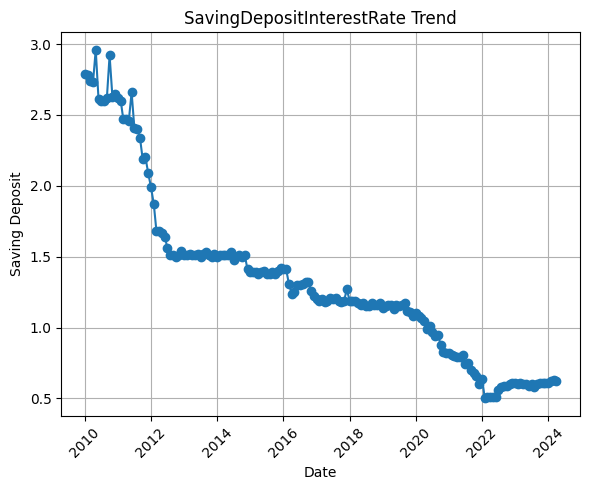

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(6, 5))
plt.plot(df['Date'], df['SavingDepositInterestRate_Persero_inPercentage'], marker='o', linestyle='-')
plt.title('SavingDepositInterestRate Trend')
plt.xlabel('Date')
plt.ylabel('Saving Deposit')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['Date'])

# Menghapus baris NaN
df = df.dropna()

# Menghapus baris yang semuanya mengandung nilai nul
# The (df_cleaned != 0).any(axis=1) checks if any value in the row is non-zero
df = df[(df != 0).any(axis=1)]

# Mengonversi kolom 'exp_percap' dari string ke float
df[df.select_dtypes(include='int').columns] = df.select_dtypes(include='int').astype(float)
df = df.apply(pd.to_numeric, errors='coerce')

df

,BIRate_inPercentage,USPrimeRate_inPercentage,ExchangeRate_USDtoIDR,ForeignExchangeReserves_inMillionUSD,ForeignExchangeReserves_MonetaryGold_inMillionUSD,ForeignExchangeReserves_SDRs_inMillionUSD,ForeignExchangeReserves_RPF_inMillionUSD,ForeignExchangeReserves_Others_inMillionUSD,SuratUtangNegaraSUN_inMillionIDR,SuratBerhargaSyariahNegaraSBSN_inMillionIDR,...,OutstandingDemandDeposit_Valas_inBillionIDR,OutstandingSavingDeposit_Rupiah_inBillionIDR,OutstandingSavingDeposit_Valas_inBillionIDR,OutstandingTimeDeposit_Rupiah_inBillionIDR,OutstandingTimeDeposit_Valas_inBillionIDR,SavingDepositInterestRate_Persero_inPercentage,SavingDepositInterestRate_Pemda_inPercentage,SavingDepositInterestRate_Private_inPercentage,SavingDepositInterestRate_Foreign_inPercentage,SavingDepositInterestRate_General_inPercentage
0,6.50,3.25,9365.0,69562.47,2553.59,2743.60,226.50,64038.78,5.776650e+05,15169.000,...,125045.3600,5.507960e+05,43074.4300,7.626724e+05,134470.8900,2.79,3.89,3.15,3.91,3.08
1,6.50,3.25,9335.0,69730.60,2588.79,2699.23,222.80,64219.78,5.773030e+05,23203.000,...,126392.5300,5.410685e+05,39990.8500,7.688128e+05,134454.5900,2.78,3.72,3.15,3.93,3.06
2,6.50,3.25,9115.0,71823.21,2598.18,2678.19,221.10,66325.74,5.716490e+05,27544.000,...,137589.7600,5.401521e+05,41453.3900,7.961739e+05,135731.2800,2.74,3.77,3.18,3.93,3.03
3,6.50,3.25,9012.0,78582.77,2738.42,2658.47,219.50,72966.37,5.800190e+05,29289.000,...,132910.1900,5.416820e+05,44369.3600,8.042122e+05,131346.4800,2.73,3.75,3.16,4.23,3.02
4,6.50,3.25,9180.0,74587.29,2834.06,2598.36,214.50,68940.37,5.856660e+05,31939.000,...,130873.0700,5.515772e+05,43165.4900,8.136474e+05,128769.8000,2.96,3.92,2.96,3.92,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,5.75,8.50,15526.0,134856.00,4732.20,7297.33,1039.74,121786.92,4.525225e+06,1060143.710,...,672711.2111,2.425207e+06,171536.9287,2.651859e+06,312185.5810,0.60,0.80,0.67,2.24,0.66
165,6.00,8.50,15916.0,133140.00,5042.03,7299.56,1040.06,119758.10,4.530699e+06,1070023.710,...,709527.8494,2.431294e+06,169729.6373,2.670171e+06,313236.4416,0.61,0.80,0.66,2.30,0.67
166,6.00,8.50,15384.0,138100.00,5165.30,7435.59,1059.72,124439.47,4.626085e+06,1049345.104,...,728889.0969,2.459759e+06,171253.5278,2.687794e+06,309067.6597,0.61,0.83,0.66,2.58,0.67
167,6.00,8.50,15416.0,146384.00,5234.38,7464.36,1063.82,132621.19,4.671491e+06,1062485.104,...,761526.7528,2.519980e+06,171280.5969,2.696569e+06,323238.2582,0.61,0.96,0.67,2.51,0.69


<Axes: >

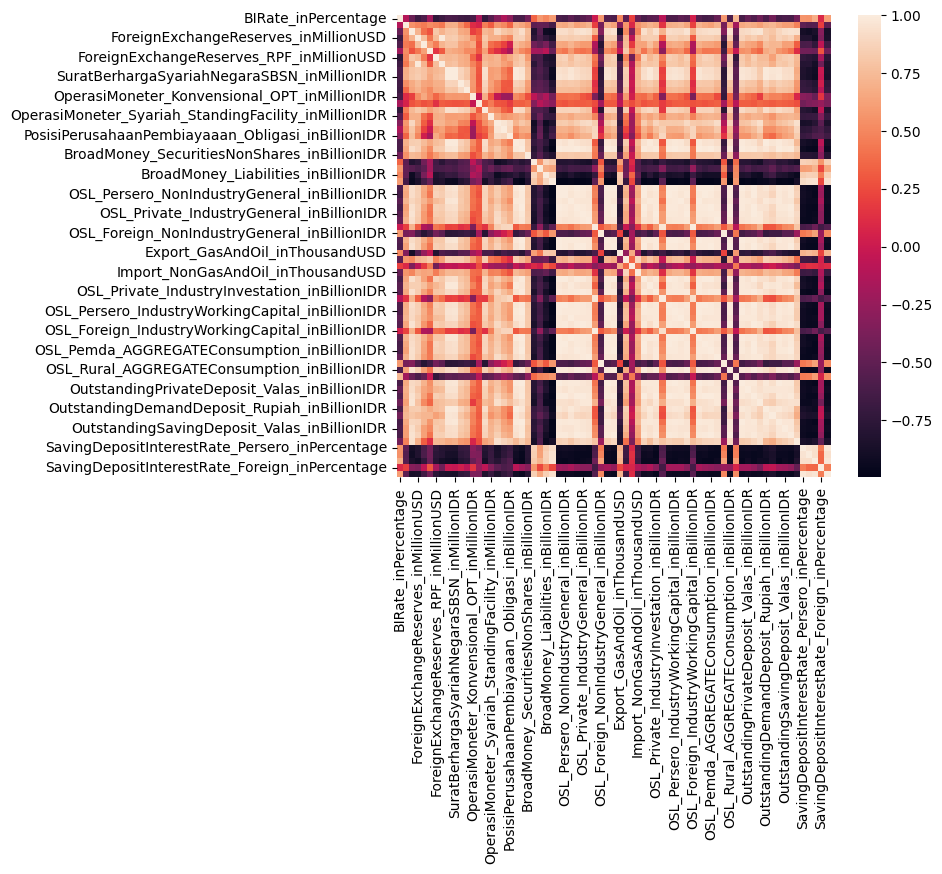

In [5]:
import seaborn as sns
corr_matrix = df.corr()
fig = plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix)

In [6]:
# Normalisasi dengaN scaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,BIRate_inPercentage,USPrimeRate_inPercentage,ExchangeRate_USDtoIDR,ForeignExchangeReserves_inMillionUSD,ForeignExchangeReserves_MonetaryGold_inMillionUSD,ForeignExchangeReserves_SDRs_inMillionUSD,ForeignExchangeReserves_RPF_inMillionUSD,ForeignExchangeReserves_Others_inMillionUSD,SuratUtangNegaraSUN_inMillionIDR,SuratBerhargaSyariahNegaraSBSN_inMillionIDR,...,OutstandingDemandDeposit_Valas_inBillionIDR,OutstandingSavingDeposit_Rupiah_inBillionIDR,OutstandingSavingDeposit_Valas_inBillionIDR,OutstandingTimeDeposit_Rupiah_inBillionIDR,OutstandingTimeDeposit_Valas_inBillionIDR,SavingDepositInterestRate_Persero_inPercentage,SavingDepositInterestRate_Pemda_inPercentage,SavingDepositInterestRate_Private_inPercentage,SavingDepositInterestRate_Foreign_inPercentage,SavingDepositInterestRate_General_inPercentage
0,0.651656,-0.598165,-1.475830,-2.848624,-1.637450,-0.164544,-1.131564,-3.018654,-1.074554,-1.151426,...,-1.299025,-1.588577,-1.687972,-1.813191,-1.932432,2.415273,2.276498,1.958176,2.998272,2.218416
1,0.651656,-0.598165,-1.489144,-2.838722,-1.587150,-0.185556,-1.140127,-3.006871,-1.074837,-1.127187,...,-1.290313,-1.605649,-1.761537,-1.802415,-1.932680,2.398580,2.071367,1.958176,3.022404,2.189686
2,0.651656,-0.598165,-1.586782,-2.715479,-1.573732,-0.195520,-1.144061,-2.869769,-1.079265,-1.114090,...,-1.217901,-1.607257,-1.726645,-1.754398,-1.913314,2.331807,2.131700,1.997525,3.022404,2.146591
3,0.651656,-0.598165,-1.632494,-2.317378,-1.373329,-0.204859,-1.147764,-2.437452,-1.072710,-1.108825,...,-1.248164,-1.604572,-1.657079,-1.740291,-1.979825,2.315114,2.107567,1.971292,3.384381,2.132226
4,0.651656,-0.598165,-1.557935,-2.552690,-1.236660,-0.233324,-1.159336,-2.699552,-1.068288,-1.100830,...,-1.261338,-1.587206,-1.685800,-1.723733,-2.018909,2.699057,2.312697,1.708960,3.010338,2.175321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.066896,2.993863,1.258477,0.996807,1.475776,1.991930,0.750577,0.740854,2.016770,2.001300,...,2.242719,1.701040,1.376759,1.502227,0.763220,-1.240529,-1.452049,-1.294740,0.983265,-1.257915
165,0.261816,2.993863,1.431562,0.895744,1.918522,1.992986,0.751318,0.608774,2.021057,2.031108,...,2.480811,1.711722,1.333643,1.534364,0.779160,-1.223836,-1.452049,-1.307856,1.055660,-1.243550
166,0.261816,2.993863,1.195456,1.187861,2.094674,2.057405,0.796819,0.913539,2.095754,1.968720,...,2.606020,1.761678,1.369998,1.565290,0.715926,-1.223836,-1.415850,-1.307856,1.393506,-1.243550
167,0.261816,2.993863,1.209658,1.675743,2.193389,2.071029,0.806308,1.446184,2.131311,2.008364,...,2.817087,1.867368,1.370644,1.580690,0.930872,-1.223836,-1.258985,-1.294740,1.309044,-1.214820


## Uji Multikolinearitas

In [7]:

import statsmodels.api as smf 

x = df[['BIRate_inPercentage', 
         'USPrimeRate_inPercentage', 
         'ExchangeRate_USDtoIDR', 
         'ForeignExchangeReserves_MonetaryGold_inMillionUSD', 
         'ForeignExchangeReserves_SDRs_inMillionUSD', 
         'ForeignExchangeReserves_RPF_inMillionUSD', 
         'ForeignExchangeReserves_Others_inMillionUSD', 
         'SuratUtangNegaraSUN_inMillionIDR', 
         'SuratBerhargaSyariahNegaraSBSN_inMillionIDR', 
         'OutstandingDemandDeposit_Valas_inBillionIDR', 
         'OutstandingSavingDeposit_Rupiah_inBillionIDR', 
         'OutstandingSavingDeposit_Valas_inBillionIDR', 
         'OutstandingTimeDeposit_Rupiah_inBillionIDR', 
         'OutstandingTimeDeposit_Valas_inBillionIDR', 
         'SavingDepositInterestRate_Pemda_inPercentage',
         'SavingDepositInterestRate_Private_inPercentage',
         'SavingDepositInterestRate_Foreign_inPercentage',
         'SavingDepositInterestRate_General_inPercentage',
         'ForeignExchangeReserves_inMillionUSD']]

y = df['SavingDepositInterestRate_Persero_inPercentage'] 

model = smf.OLS(y, x).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     SavingDepositInterestRate_Persero_inPercentage   R-squared (uncentered):                   0.998
Model:                                                        OLS   Adj. R-squared (uncentered):              0.998
Method:                                             Least Squares   F-statistic:                              3710.
Date:                                            Tue, 01 Oct 2024   Prob (F-statistic):                   4.06e-190
Time:                                                    00:27:53   Log-Likelihood:                          215.08
No. Observations:                                             169   AIC:                                     -392.2
Df Residuals:                                                 150   BIC:                                     -332.7
Df Model:                                                      19                                                  
Covariance Type:                                        nonrobust                                                  
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
BIRate_inPercentage                                   0.0211      0.014      1.528      0.129      -0.006       0.048
USPrimeRate_inPercentage                             -0.0035      0.010     -0.357      0.722      -0.023       0.016
ExchangeRate_USDtoIDR                              6.056e-05   2.01e-05      3.017      0.003    2.09e-05       0.000
ForeignExchangeReserves_MonetaryGold_inMillionUSD  -3.61e-05   3.31e-05     -1.091      0.277      -0.000    2.93e-05
ForeignExchangeReserves_SDRs_inMillionUSD            1.4e-06    2.6e-05      0.054      0.957   -4.99e-05    5.27e-05
ForeignExchangeReserves_RPF_inMillionUSD           6.644e-05   6.14e-05      1.082      0.281   -5.49e-05       0.000
ForeignExchangeReserves_Others_inMillionUSD        1.545e-05   2.52e-05      0.613      0.541   -3.44e-05    6.53e-05
SuratUtangNegaraSUN_inMillionIDR                   1.944e-07    9.5e-08      2.047      0.042    6.78e-09    3.82e-07
SuratBerhargaSyariahNegaraSBSN_inMillionIDR        9.821e-07   3.13e-07      3.142      0.002    3.65e-07     1.6e-06
OutstandingDemandDeposit_Valas_inBillionIDR       -1.093e-06   2.68e-07     -4.071      0.000   -1.62e-06   -5.62e-07
OutstandingSavingDeposit_Rupiah_inBillionIDR      -2.665e-07   1.33e-07     -1.998      0.048    -5.3e-07   -2.92e-09
OutstandingSavingDeposit_Valas_inBillionIDR       -3.549e-06   9.76e-07     -3.637      0.000   -5.48e-06   -1.62e-06
OutstandingTimeDeposit_Rupiah_inBillionIDR        -3.737e-07   1.41e-07     -2.644      0.009   -6.53e-07   -9.44e-08
OutstandingTimeDeposit_Valas_inBillionIDR          2.351e-07   4.63e-07      0.508      0.612   -6.79e-07    1.15e-06
SavingDepositInterestRate_Pemda_inPercentage          0.2690      0.028      9.742      0.000       0.214       0.324
SavingDepositInterestRate_Private_inPercentage       -0.0558      0.049     -1.130      0.260      -0.153       0.042
SavingDepositInterestRate_Foreign_inPercentage       -0.0305      0.021     -1.473      0.143      -0.071       0.010
SavingDepositInterestRate_General_inPercentage        0.6247      0.046     13.538      0.000       0.534       0.716
ForeignExchangeReserves_inMillionUSD              -1.295e-05   2.51e-05     -0.516      0.607   -6.26e-05    3.67e-05
==============================================================================
O

In [8]:
y_pred = model.predict(x) 
error = y-y_pred 
gab= pd.DataFrame({'Actual': y,  'Predicted': y_pred, 'Error':error}) 
gab

,Actual,Predicted,Error
0,2.79,2.820605,-0.030605
1,2.78,2.776579,0.003421
2,2.74,2.737298,0.002702
3,2.73,2.714915,0.015085
4,2.96,2.799288,0.160712
...,...,...,...
164,0.60,0.609738,-0.009738
165,0.61,0.592048,0.017952
166,0.61,0.521011,0.088989
167,0.61,0.558885,0.051115


In [9]:
# Model Evaluation
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y, y_pred) 
meanSqErr = metrics.mean_squared_error(y, y_pred) 
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred)) 
print('Mean Absolute Error:', meanAbErr) 
print('Mean Square Error:', meanSqErr) 
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.04797404914488534
Mean Square Error: 0.004593023997091154
Root Mean Square Error: 0.06777185254285996


In [10]:
# VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(len(x.columns))]
print(vif_data)

                                              feature            VIF
0                                 BIRate_inPercentage     209.742788
1                            USPrimeRate_inPercentage      60.726076
2                               ExchangeRate_USDtoIDR    2186.197145
3   ForeignExchangeReserves_MonetaryGold_inMillionUSD     506.598319
4           ForeignExchangeReserves_SDRs_inMillionUSD     308.280535
5            ForeignExchangeReserves_RPF_inMillionUSD      86.029664
6         ForeignExchangeReserves_Others_inMillionUSD  257967.942952
7                    SuratUtangNegaraSUN_inMillionIDR    1599.768351
8         SuratBerhargaSyariahNegaraSBSN_inMillionIDR     852.875372
9         OutstandingDemandDeposit_Valas_inBillionIDR     306.370609
10       OutstandingSavingDeposit_Rupiah_inBillionIDR    1420.144766
11        OutstandingSavingDeposit_Valas_inBillionIDR     457.577681
12         OutstandingTimeDeposit_Rupiah_inBillionIDR    2316.453701
13          OutstandingTimeDeposit

## Solusi Multiko 1: PCA

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#scale predictor variables
pca = PCA() 
xr=pca.fit_transform(scale(x))

xr = pd.DataFrame (xr) 
vif_data_r = pd.DataFrame() 
vif_data_r["feature"] = x.columns 
vif_data_r["VIF"] = [variance_inflation_factor(xr.values, i) 
    for i in range(len(xr.columns))] 
vif_data_r

,feature,VIF
0,BIRate_inPercentage,1.0
1,USPrimeRate_inPercentage,1.0
2,ExchangeRate_USDtoIDR,1.0
3,ForeignExchangeReserves_MonetaryGold_inMillionUSD,1.0
4,ForeignExchangeReserves_SDRs_inMillionUSD,1.0
5,ForeignExchangeReserves_RPF_inMillionUSD,1.0
6,ForeignExchangeReserves_Others_inMillionUSD,1.0
7,SuratUtangNegaraSUN_inMillionIDR,1.0
8,SuratBerhargaSyariahNegaraSBSN_inMillionIDR,1.0
9,OutstandingDemandDeposit_Valas_inBillionIDR,1.0


In [12]:
# import statsmodels.api as sm
xr = smf.add_constant(xr)
modelPCA= smf.OLS(y,xr).fit()
print(modelPCA.summary())

                                          OLS Regression Results                                          
Dep. Variable:     SavingDepositInterestRate_Persero_inPercentage   R-squared:                       0.987
Model:                                                        OLS   Adj. R-squared:                  0.986
Method:                                             Least Squares   F-statistic:                     617.0
Date:                                            Tue, 01 Oct 2024   Prob (F-statistic):          2.32e-131
Time:                                                    00:27:55   Log-Likelihood:                 216.74
No. Observations:                                             169   AIC:                            -393.5
Df Residuals:                                                 149   BIC:                            -330.9
Df Model:                                                      19                                         
Covariance Type:                     

In [13]:
# Prediksi dari model
y_pred = modelPCA.predict(xr)

# Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y,y_pred)
MeanSqErr = metrics.mean_squared_error(y,y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', MeanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.04719359656919951
Mean Square Error: 0.004503546440475364
Root Mean Square Error: 0.06710846772558113


## Solusi Multiko 2: Regresi Ridge

In [14]:
alphas = 10**np.linspace(10,-2,100)*0.5 
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [15]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_scaled, y)  
    coefs.append(ridge.coef_)
print(np.shape(coefs))

(100, 19)


Text(0, 0.5, 'weights')

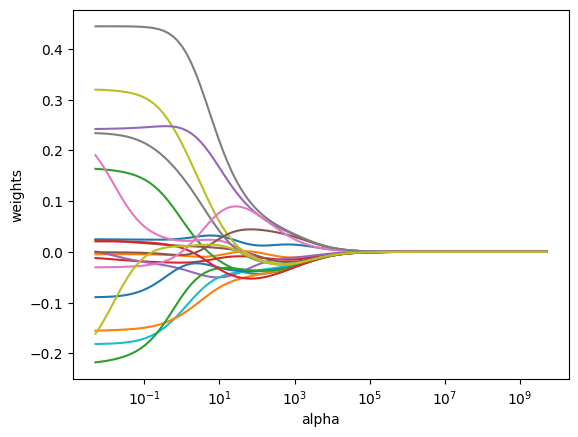

In [16]:
ax = plt.gca() 
ax.plot(alphas, coefs) 
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('alpha') 
plt.ylabel('weights')

In [17]:
# Model Evaluation
from sklearn import metrics
alphas = [None]

for alpha in alphas:
    if alpha is None:
        ridge = RidgeCV(alphas=[0.1, 0.5, 1, 2, 4, 10])  
        ridge.fit(x_scaled, y)
        best_alpha = ridge.alpha_ 
        print(f"Best Alpha (RidgeCV): {best_alpha}")
    else:
        ridge = Ridge(alpha=alpha)
        ridge.fit(x_scaled, y)
        best_alpha = alpha
    pred_ridge = ridge.predict(x_scaled)
    print(f"Mean Squared Error: {metrics.mean_squared_error(y, pred_ridge)}") 

Best Alpha (RidgeCV): 1.0
Mean Squared Error: 0.004998008522918796


In [18]:
pd.Series(ridge.coef_, index=x.columns)

BIRate_inPercentage                                  0.026101
USPrimeRate_inPercentage                            -0.007688
ExchangeRate_USDtoIDR                                0.063378
ForeignExchangeReserves_MonetaryGold_inMillionUSD   -0.021191
ForeignExchangeReserves_SDRs_inMillionUSD           -0.034060
ForeignExchangeReserves_RPF_inMillionUSD             0.011866
ForeignExchangeReserves_Others_inMillionUSD          0.021855
SuratUtangNegaraSUN_inMillionIDR                     0.148491
SuratBerhargaSyariahNegaraSBSN_inMillionIDR          0.212960
OutstandingDemandDeposit_Valas_inBillionIDR         -0.115985
OutstandingSavingDeposit_Rupiah_inBillionIDR        -0.029072
OutstandingSavingDeposit_Valas_inBillionIDR         -0.123159
OutstandingTimeDeposit_Rupiah_inBillionIDR          -0.087558
OutstandingTimeDeposit_Valas_inBillionIDR            0.007641
SavingDepositInterestRate_Pemda_inPercentage         0.242919
SavingDepositInterestRate_Private_inPercentage      -0.006141
SavingDe

## Solusi Multiko 3: Regresi Lasso

In [19]:
alphas = 10**np.linspace(10,-2,100)*0.5 
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Text(0, 0.5, 'weights')

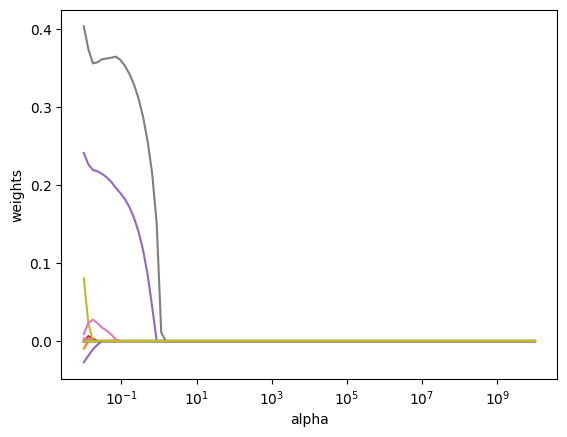

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lasso = Lasso(max_iter=10000)
coefs = [] 
for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(scale(x), y) 
    coefs.append(lasso.coef_) 
ax = plt.gca() 
ax.plot(alphas*2, coefs) 
ax.set_xscale('log')
plt.axis('tight') 
plt.xlabel('alpha') 
plt.ylabel('weights')

In [21]:
from sklearn import metrics
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lasso_cv = LassoCV(alphas=None, cv=10, max_iter=100000)
lasso_cv.fit(x_scaled, y)
best_alpha = lasso_cv.alpha_
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(x_scaled, y)
mse = metrics.mean_squared_error(y, lasso.predict(x_scaled))

print(f"Best Alpha (Lasso): {best_alpha}")
print(f"Mean Squared Error: {mse}")

Best Alpha (Lasso): 0.002205210315875368
Mean Squared Error: 0.0061381237601376495


In [22]:
pd.Series(lasso.coef_, index=x.columns)

BIRate_inPercentage                                  0.001416
USPrimeRate_inPercentage                             0.000000
ExchangeRate_USDtoIDR                                0.000000
ForeignExchangeReserves_MonetaryGold_inMillionUSD   -0.000000
ForeignExchangeReserves_SDRs_inMillionUSD           -0.038308
ForeignExchangeReserves_RPF_inMillionUSD             0.000000
ForeignExchangeReserves_Others_inMillionUSD          0.002335
SuratUtangNegaraSUN_inMillionIDR                     0.000000
SuratBerhargaSyariahNegaraSBSN_inMillionIDR          0.183287
OutstandingDemandDeposit_Valas_inBillionIDR         -0.039334
OutstandingSavingDeposit_Rupiah_inBillionIDR         0.000000
OutstandingSavingDeposit_Valas_inBillionIDR         -0.041079
OutstandingTimeDeposit_Rupiah_inBillionIDR           0.000000
OutstandingTimeDeposit_Valas_inBillionIDR            0.000000
SavingDepositInterestRate_Pemda_inPercentage         0.243148
SavingDepositInterestRate_Private_inPercentage      -0.000000
SavingDe

## Cek Heteroskedastisitas

In [23]:
import statsmodels.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm
#xr = sm.add_constant(x)
#fit = smf.OLS(y,x).fit()
#fit.summary()

In [24]:
# Breusch-Pagan Test
bp_test = sms.het_breuschpagan(modelPCA.resid, modelPCA.model.exog)
bp_labels = ['Statistik LM', 'P-Value LM', 'Statistik F', 'P-Value F']
lzip(bp_labels, bp_test)

[('Statistik LM', 39.49628467111048),
 ('P-Value LM', 0.0038082767087905065),
 ('Statistik F', 2.391699891450164),
 ('P-Value F', 0.0018571899105357646)]

In [25]:
residuals = y - lasso.predict(x_scaled)
# residuals = modelPCA.resid
exog = modelPCA.model.exog

# bp_test = het_breuschpagan(residuals, exog)
# bp_labels = ['Statistik LM', 'P-Value LM', 'Statistik F', 'P-Value F']
# lzip(bp_labels, bp_test)

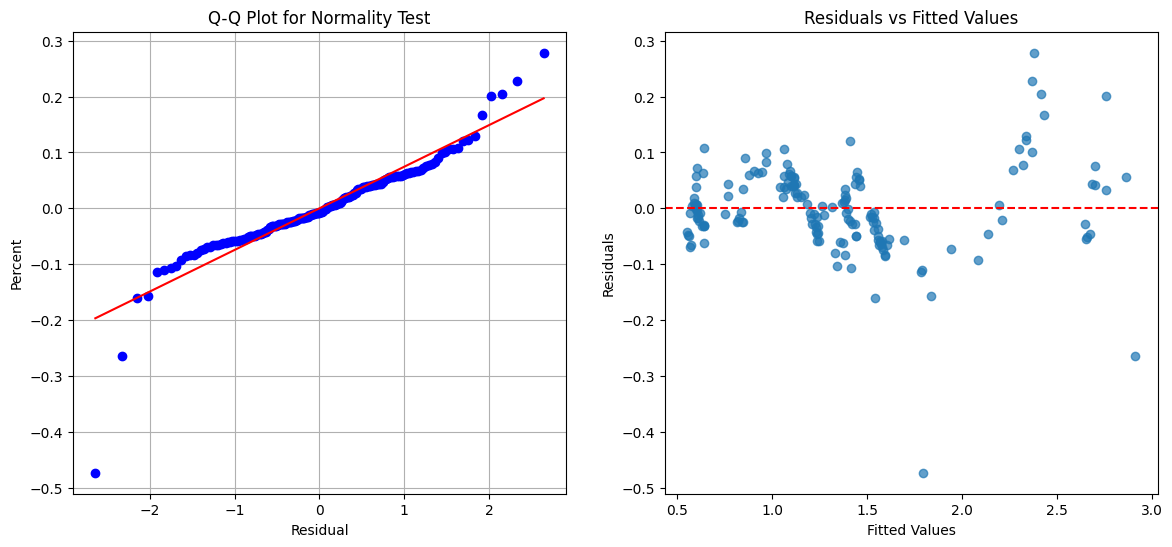

In [26]:
import scipy.stats as stats

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(lasso.predict(x_scaled), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Test")
plt.xlabel("Residual")
plt.ylabel("Percent")
plt.grid(True)
plt.show()

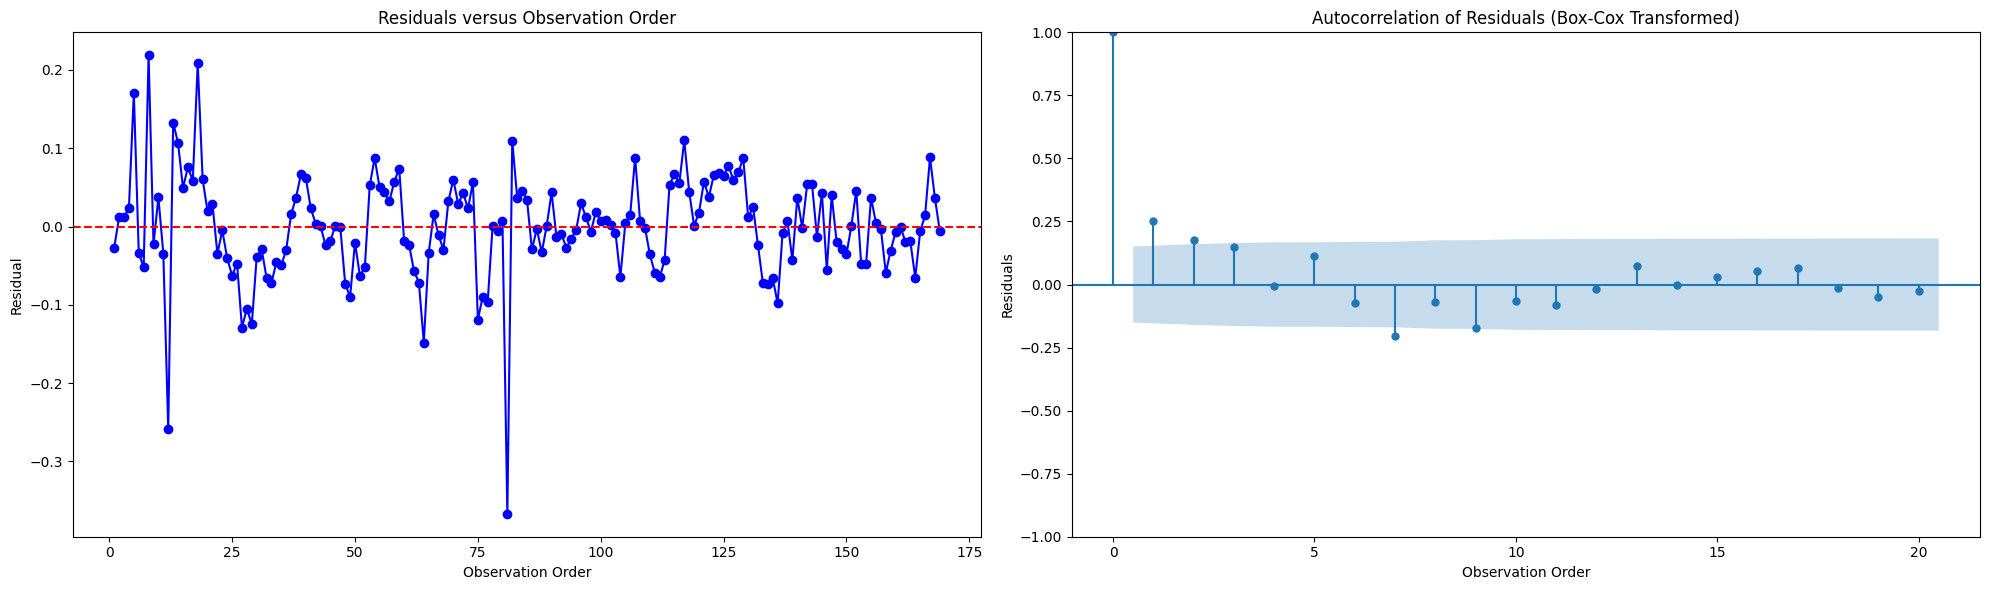

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
residuals = y - y_pred

# residuals_boxcox, _ = boxcox(residuals + np.abs(np.min(residuals)) + 1)  
observation_order = np.arange(1, len(residuals) + 1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(observation_order, residuals, marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals versus Observation Order')
plt.xlabel('Observation Order')
plt.ylabel('Residual')

plt.subplot(1, 2, 2)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation of Residuals (Box-Cox Transformed)')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [28]:

import scipy.stats as stats
lambda_value = 0.30

for kolom in df.columns:
    transformed_data = stats.boxcox(df[kolom], lmbda=lambda_value)
    df['transformed_' + kolom] = transformed_data
    
df_transformed = df.copy()
df_transformed.head()

,BIRate_inPercentage,USPrimeRate_inPercentage,ExchangeRate_USDtoIDR,ForeignExchangeReserves_inMillionUSD,ForeignExchangeReserves_MonetaryGold_inMillionUSD,ForeignExchangeReserves_SDRs_inMillionUSD,ForeignExchangeReserves_RPF_inMillionUSD,ForeignExchangeReserves_Others_inMillionUSD,SuratUtangNegaraSUN_inMillionIDR,SuratBerhargaSyariahNegaraSBSN_inMillionIDR,...,transformed_OutstandingDemandDeposit_Valas_inBillionIDR,transformed_OutstandingSavingDeposit_Rupiah_inBillionIDR,transformed_OutstandingSavingDeposit_Valas_inBillionIDR,transformed_OutstandingTimeDeposit_Rupiah_inBillionIDR,transformed_OutstandingTimeDeposit_Valas_inBillionIDR,transformed_SavingDepositInterestRate_Persero_inPercentage,transformed_SavingDepositInterestRate_Pemda_inPercentage,transformed_SavingDepositInterestRate_Private_inPercentage,transformed_SavingDepositInterestRate_Foreign_inPercentage,transformed_SavingDepositInterestRate_General_inPercentage
0,6.5,3.25,9365.0,69562.47,2553.59,2743.60,226.5,64038.78,577665.0,15169.0,...,109.386158,172.530271,78.540402,190.567712,111.870579,1.201486,1.676965,1.369633,1.684680,1.338033
1,6.5,3.25,9335.0,69730.60,2588.79,2699.23,222.8,64219.78,577303.0,23203.0,...,109.749106,171.592686,76.736133,191.034736,111.866390,1.196604,1.610247,1.369633,1.692366,1.328913
2,6.5,3.25,9115.0,71823.21,2598.18,2678.19,221.1,66325.74,571649.0,27544.0,...,112.665756,171.503751,77.603603,193.084594,112.193463,1.176951,1.630088,1.383026,1.692366,1.315153
3,6.5,3.25,9012.0,78582.77,2738.42,2658.47,219.5,72966.37,580019.0,29289.0,...,111.467814,171.652171,79.271164,193.677423,111.060938,1.172006,1.622174,1.374107,1.804510,1.310545
4,6.5,3.25,9180.0,74587.29,2834.06,2598.36,214.5,68940.37,585666.0,31939.0,...,110.937089,172.605061,78.592289,194.368012,110.383027,1.282672,1.688526,1.282672,1.688526,1.324336


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

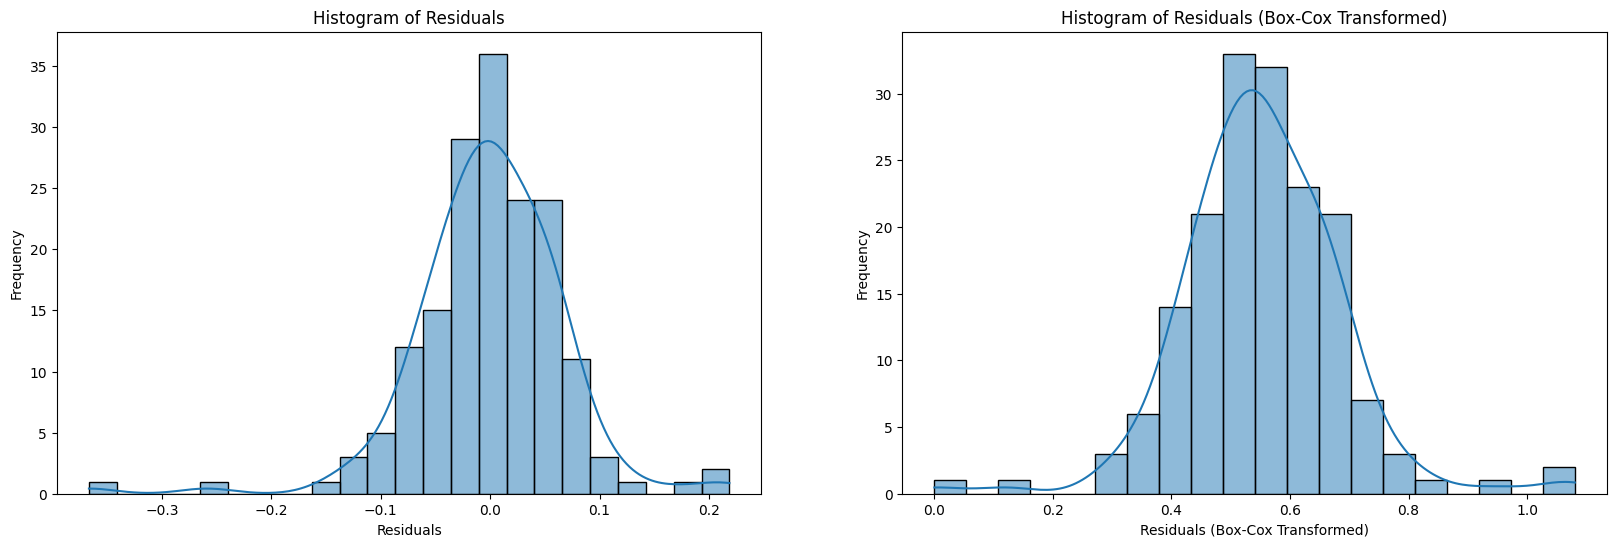

In [29]:
from scipy.stats import boxcox

residuals = y - y_pred
residuals_boxcox, _ = boxcox(residuals + np.abs(np.min(residuals)) + 1)  

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(residuals_boxcox, kde=True)
plt.title('Histogram of Residuals (Box-Cox Transformed)')
plt.xlabel('Residuals (Box-Cox Transformed)')
plt.ylabel('Frequency')

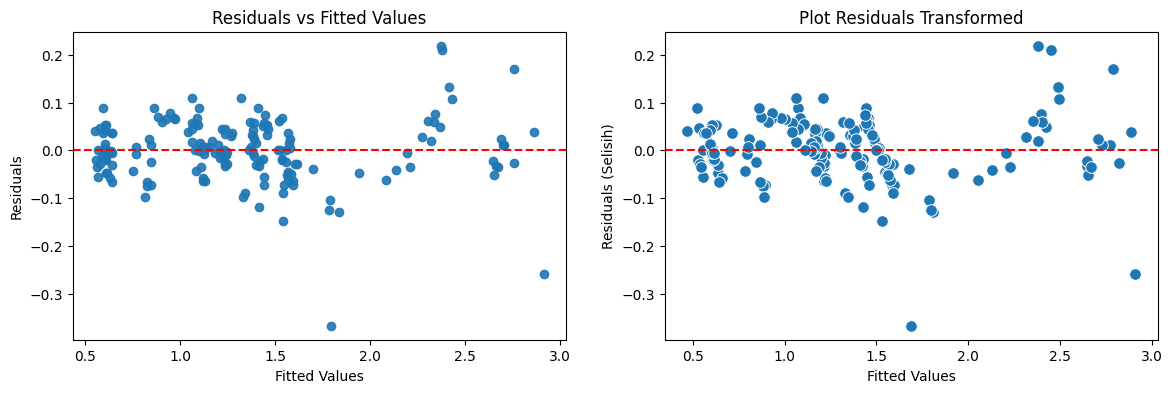

In [30]:
X = df[['BIRate_inPercentage', 
         'USPrimeRate_inPercentage', 
         'ExchangeRate_USDtoIDR', 
         'ForeignExchangeReserves_MonetaryGold_inMillionUSD', 
         'ForeignExchangeReserves_SDRs_inMillionUSD', 
         'ForeignExchangeReserves_RPF_inMillionUSD', 
         'ForeignExchangeReserves_Others_inMillionUSD', 
         'SuratUtangNegaraSUN_inMillionIDR', 
         'SuratBerhargaSyariahNegaraSBSN_inMillionIDR', 
         'OutstandingDemandDeposit_Valas_inBillionIDR', 
         'OutstandingSavingDeposit_Rupiah_inBillionIDR', 
         'OutstandingSavingDeposit_Valas_inBillionIDR', 
         'OutstandingTimeDeposit_Rupiah_inBillionIDR', 
         'OutstandingTimeDeposit_Valas_inBillionIDR', 
         'SavingDepositInterestRate_Pemda_inPercentage',
         'SavingDepositInterestRate_Private_inPercentage',
         'SavingDepositInterestRate_Foreign_inPercentage',
         'SavingDepositInterestRate_General_inPercentage',
         'ForeignExchangeReserves_inMillionUSD']]
y = df['SavingDepositInterestRate_Persero_inPercentage']
X = smf.add_constant(X)
model_transformed = smf.OLS(y, X).fit()

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(lasso.predict(x_scaled), residuals, alpha=0.9)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
fitted_values = model_transformed.fittedvalues
residuals = model_transformed.resid
sns.scatterplot(x=fitted_values, y=residuals, s=70)
plt.axhline(0, color='red', linestyle='--')
plt.title('Plot Residuals Transformed')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals (Selisih)')
plt.show()

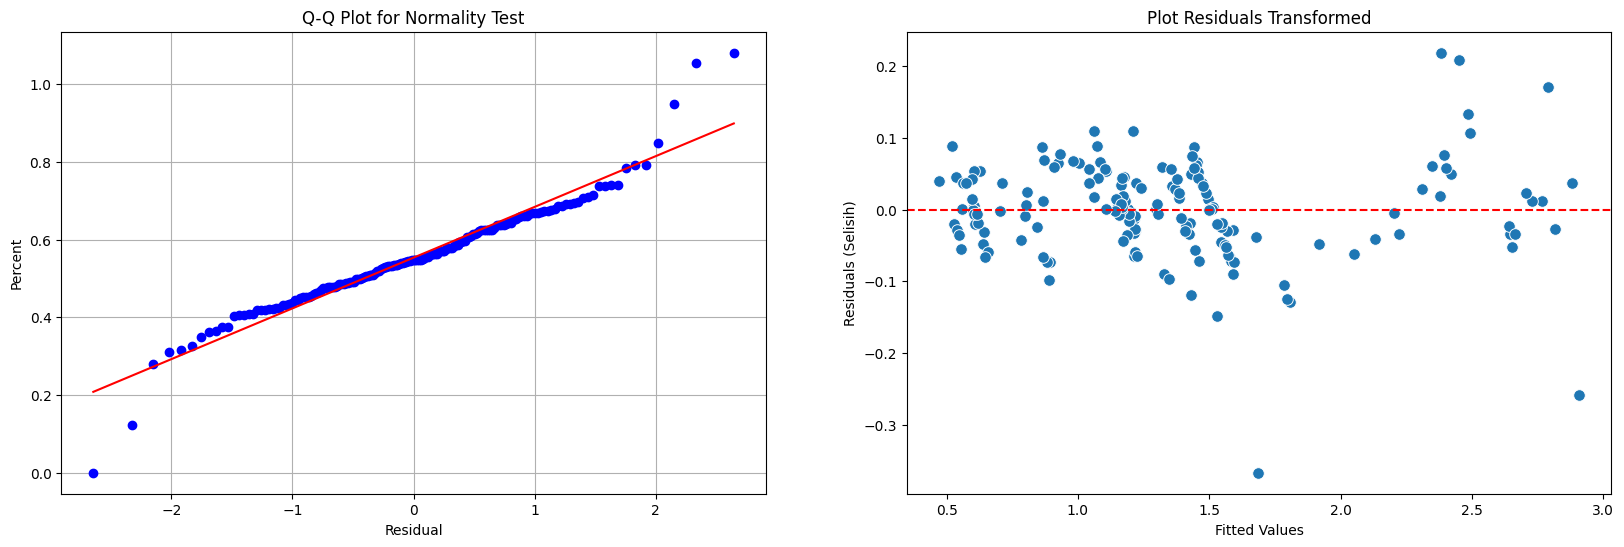

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
stats.probplot(residuals_boxcox, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Test")
plt.xlabel("Residual")
plt.ylabel("Percent")
plt.grid(True)

plt.subplot(1, 2, 2)
fitted_values = model_transformed.fittedvalues
residuals = model_transformed.resid
sns.scatterplot(x=fitted_values, y=residuals, s=70)
plt.axhline(0, color='red', linestyle='--')
plt.title('Plot Residuals Transformed')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals (Selisih)')
plt.show()

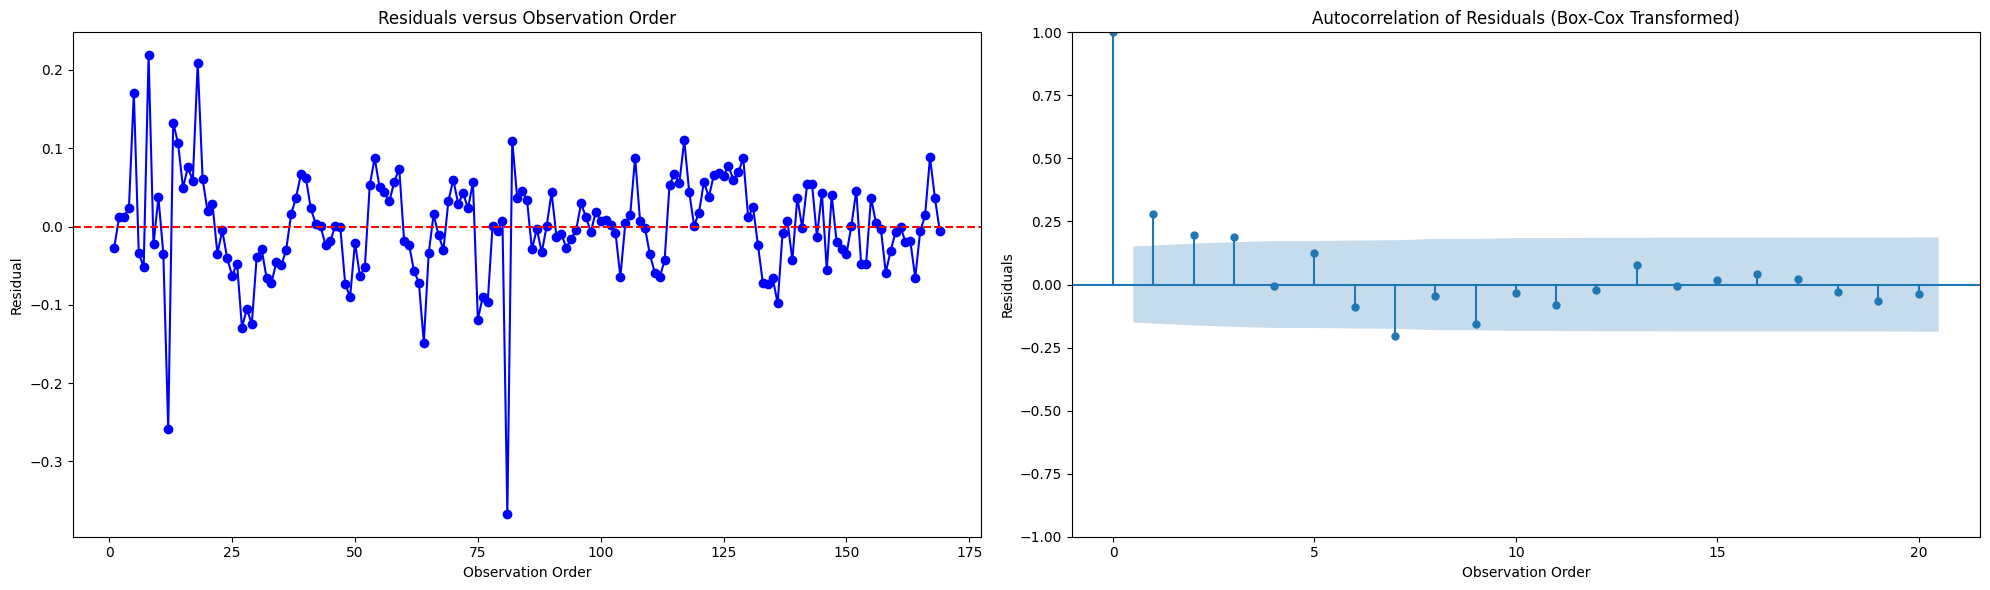

In [32]:
residuals = y - y_pred
residuals_boxcox, _ = boxcox(residuals + np.abs(np.min(residuals)) + 1)  
observation_order = np.arange(1, len(residuals) + 1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(observation_order, residuals, marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals versus Observation Order')
plt.xlabel('Observation Order')
plt.ylabel('Residual')

plt.subplot(1, 2, 2)
plot_acf(residuals_boxcox, lags=20, ax=plt.gca())
plt.title('Autocorrelation of Residuals (Box-Cox Transformed)')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [33]:
weights = 1 / (modelPCA.resid ** 2)

model_wls = smf.WLS(df['SavingDepositInterestRate_Persero_inPercentage'], modelPCA.model.exog, weights=weights).fit()
test_result = sms.het_breuschpagan(model_wls.resid, model_wls.model.exog)
lzip(bp_test, test_result)

[(39.49628467111048, 57.360026925266084),
 (0.0038082767087905065, 1.0044809508672645e-05),
 (2.391699891450164, 4.029232152755782),
 (0.0018571899105357646, 5.79001347732179e-07)]

## Uji Residual

In [34]:
from statsmodels.stats.stattools import jarque_bera

jb_test = jarque_bera(residuals)
jb_stat = jb_test[0]  
jb_p_value = jb_test[1]  
print(f"Jarque-Bera Test: Stat = {jb_stat}, p-value = {jb_p_value}")

shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Stat = {shapiro_stat}, p-value = {shapiro_p_value}")

ks_statistic, ks_p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f'Kolmogorov-Smirnov Test: Stat = {ks_statistic}, p-value: {ks_p_value}')

Jarque-Bera Test: Stat = 282.50277717048954, p-value = 4.521696161338001e-62
Shapiro-Wilk Test: Stat = 0.9201158285140991, p-value = 5.1967681713449565e-08
Kolmogorov-Smirnov Test: Stat = 0.0732329683611547, p-value: 0.3097794483002644


In [35]:
jb_test = jarque_bera(residuals_boxcox)
jb_stat = jb_test[0]  # nilai statistik JB
jb_p_value = jb_test[1]  # p-value JB
print(f"Jarque-Bera Test: Stat = {jb_stat}, p-value = {jb_p_value}")

Jarque-Bera Test: Stat = 91.28761375343328, p-value = 1.5036492443926138e-20


## Uji Autokorelasi

In [36]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw}') 

Durbin-Watson Statistic: 1.4954166390698076


In [37]:
print(model.summary())

                                               OLS Regression Results                                              
Dep. Variable:     SavingDepositInterestRate_Persero_inPercentage   R-squared (uncentered):                   0.998
Model:                                                        OLS   Adj. R-squared (uncentered):              0.998
Method:                                             Least Squares   F-statistic:                              3710.
Date:                                            Tue, 01 Oct 2024   Prob (F-statistic):                   4.06e-190
Time:                                                    00:28:01   Log-Likelihood:                          215.08
No. Observations:                                             169   AIC:                                     -392.2
Df Residuals:                                                 150   BIC:                                     -332.7
Df Model:                                                      19       

## Uji Normalitas

In [38]:
ks_statistic, ks_p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f'Kolmogorov-Smirnov Statistic: {ks_statistic}')
print(f'Kolmogorov-Smirnov p-value: {ks_p_value}')

Kolmogorov-Smirnov Statistic: 0.0732329683611547
Kolmogorov-Smirnov p-value: 0.3097794483002644


In [39]:
# Prediksi dari model
y_pred = modelPCA.predict(xr)

# Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y,y_pred)
MeanSqErr = metrics.mean_squared_error(y,y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', MeanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.04719359656919951
Mean Square Error: 0.004503546440475364
Root Mean Square Error: 0.06710846772558113


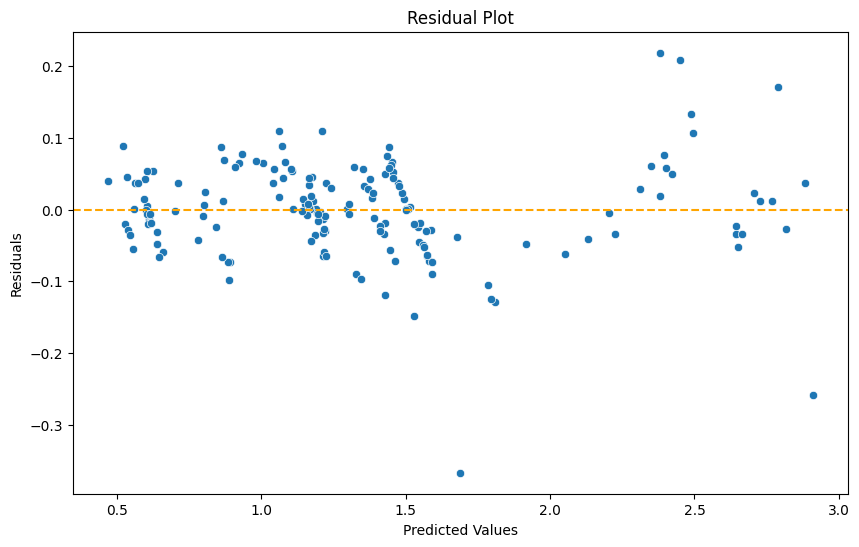

In [40]:
residuals = y - y_pred  # Menghitung residual

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='orange', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

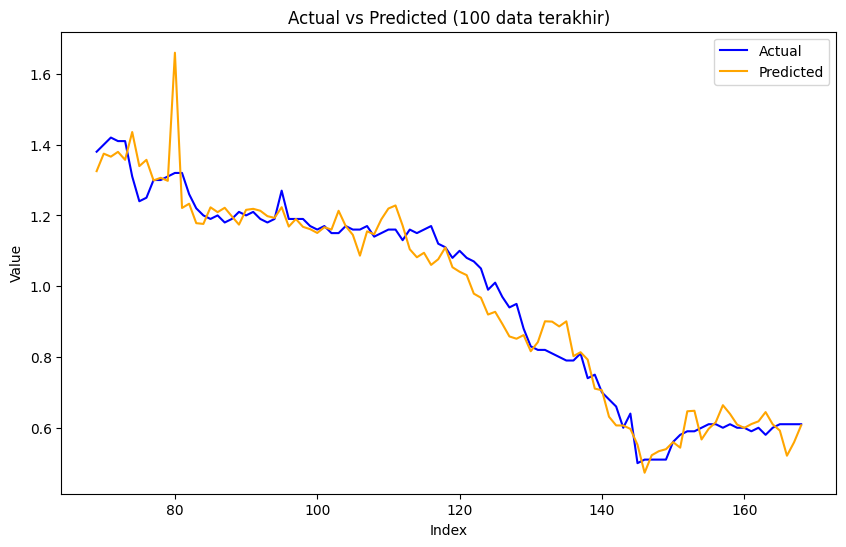

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Membatasi data untuk 100 data terakhir
last_100 = gab.tail(100)

# Membuat plot
plt.figure(figsize=(10,6))
plt.plot(last_100.index, last_100['Actual'], label='Actual', color='blue')
plt.plot(last_100.index, last_100['Predicted'], label='Predicted', color='orange')

# Menambahkan judul dan label
plt.title('Actual vs Predicted (100 data terakhir)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Menampilkan plot
plt.show()